In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import join
from utils import (concatenate_data_dataframes, 
                   find_sum_of_values,
                   find_sum_of_values_per_period)

plt.xkcd()

In [2]:
data = concatenate_data_dataframes('../data/')

In [3]:
meals = data[data['subquota_description']=='Congressperson meal']
meals.head()

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,...,net_value,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id
142,5844658,ABEL MESQUITA JR.,178957,1,2015.0,RR,DEM,55,13,Congressperson meal,...,62.69,10,2015,0,NaN,NaN,1242398,5230,NaN,3074
143,5832140,ABEL MESQUITA JR.,178957,1,2015.0,RR,DEM,55,13,Congressperson meal,...,121.50,10,2015,0,NaN,NaN,1238293,5212,NaN,3074
144,5844722,ABEL MESQUITA JR.,178957,1,2015.0,RR,DEM,55,13,Congressperson meal,...,50.53,11,2015,0,NaN,NaN,1242398,5230,NaN,3074
554,5805588,ADAIL CARNEIRO,178864,92,2015.0,CE,PP,55,13,Congressperson meal,...,150.40,9,2015,0,NaN,NaN,1230823,5177,NaN,3016
555,5713563,ADAIL CARNEIRO,178864,92,2015.0,CE,PP,55,13,Congressperson meal,...,90.50,6,2015,0,NaN,NaN,1202595,5066,NaN,3016


In [4]:
infos = {}

infos['total_spent'] = meals['net_value'].sum()
infos['initial_year'] = int(np.min(meals['year']))
infos['last_year'] = int(np.max(meals['year']))
infos

{'initial_year': 2011, 'last_year': 2016, 'total_spent': 9833786.5600000005}

# Total value spent of meals during all data records

Following data and graphs considers all expenditues since the initial record until the last data record.


/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


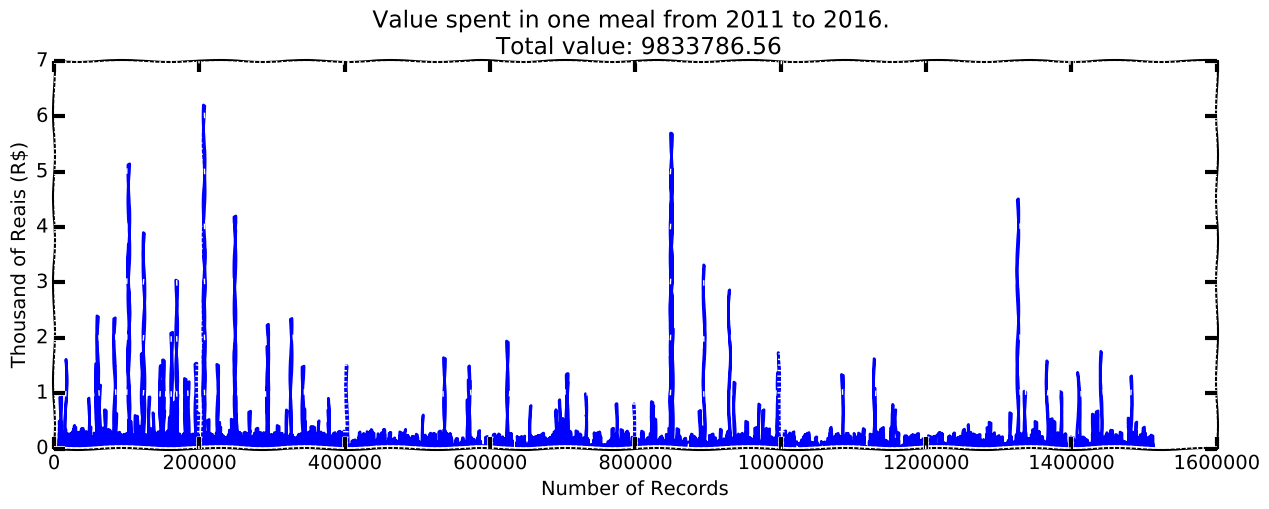

In [5]:
plt.figure(figsize=(15,5))
plt.plot(meals['net_value']/1000)
plt.title('Value spent in one meal from {} to {}. \n Total value: {}'. format(infos['initial_year'],
                                                                              infos['last_year'],
                                                                              infos['total_spent']))
plt.ylabel('Thousand of Reais (R$)')
plt.xlabel('Number of Records')
plt.grid()

#  List of total expenditures on meals by congress person


Attention! Ids can be nan from party expenses!

You can't use ids to get unique values

In [6]:
sum_per_person = find_sum_of_values(meals, 'congressperson_name', 'net_value')

if (sum_per_person['net_value_total'].sum() - infos['total_spent']) == 0:
    print('Values are ok!')

In [7]:
infos['mean_value_spent'] = np.mean(sum_per_person['net_value_total'])
infos['max_value_spent'] = np.max(sum_per_person['net_value_total'])
infos['min_value_spent'] = np.min(sum_per_person['net_value_total'])
infos['min_value_spent_by'] = sum_per_person['congressperson_name'][sum_per_person['net_value_total'] == infos['min_value_spent']]
infos['max_value_spent_by'] = sum_per_person['congressperson_name'][sum_per_person['net_value_total'] == infos['max_value_spent']]

print('Mean value spent on meals: {}'.format(infos['mean_value_spent']))
print('Max value spent on meals: {}'.format(infos['max_value_spent']))
print('Max value spent on meals by: {}'.format(infos['max_value_spent_by']))
print('---')
print('Min value spent on meals: {}'.format(infos['min_value_spent']))
print('Min value spent on meals by: {}'.format(infos['min_value_spent_by']))

Mean value spent on meals: 11805.265978391355
Max value spent on meals: 193858.61
Max value spent on meals by: 270    LIDERANÇA DO PSDB
Name: congressperson_name, dtype: object
---
Min value spent on meals: 15.219999999999999
Min value spent on meals by: 645    ITAMAR ROCHA
Name: congressperson_name, dtype: object


# Top ten most expensive congress person

In [8]:
sum_per_person.sort_values(by='net_value_total', ascending=False)[0:10]

,congressperson_name,net_value_max,net_value_mean,net_value_min,net_value_total,occurences
270,LIDERANÇA DO PSDB,4990.00,745.610038,11.00,193858.61,260.0
407,ROGÉRIO PENINHA MENDONÇA,377.00,99.832057,6.30,172310.13,1726.0
398,ROBERTO FREIRE,277.30,89.652541,3.00,165139.98,1842.0
271,LIDERANÇA DO PT,6205.00,404.127284,2.90,163671.55,405.0
122,DR. ADILSON SOARES,241.89,51.877946,2.50,141471.16,2727.0
176,FRANCISCO FLORIANO,278.25,59.638577,1.75,127388.00,2136.0
460,VANDERLEI MACRIS,210.00,40.541069,1.55,119028.58,2936.0
135,EDSON PIMENTA,310.00,123.149726,13.96,112435.70,913.0
42,ANTONIO BULHÕES,234.00,96.270239,10.48,104838.29,1089.0
422,RUBENS BUENO,697.00,91.668005,2.50,100651.47,1098.0


/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


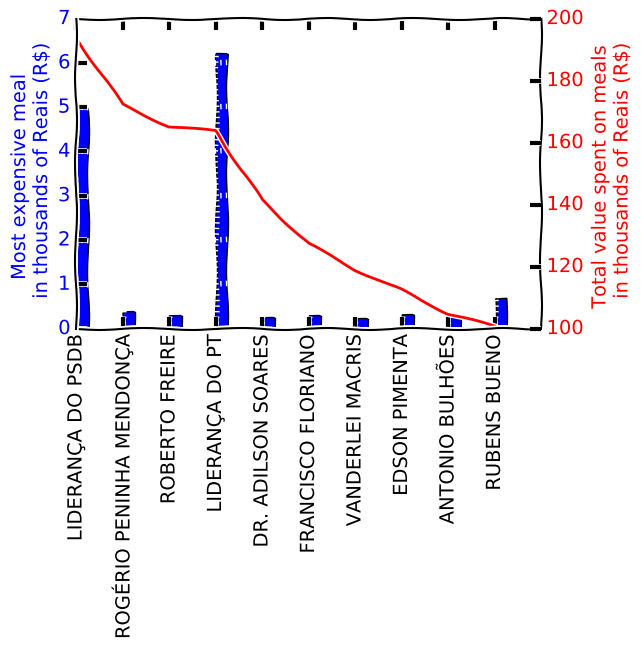

In [9]:
first_ten = sum_per_person.sort_values(by='net_value_total', ascending=False)[0:10]

major_ticks = first_ten['congressperson_name']


fig, ax1 = plt.subplots()
fig.set_figheight = 5

ax1.bar(range(10), first_ten['net_value_max']/1000, 0.25)
ax1.set_ylabel('Most expensive meal \n in thousands of Reais (R$)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
   
ax2 = ax1.twinx()
ax2.set_ylabel('Total value spent on meals \n in thousands of Reais (R$)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.plot(range(10), first_ten['net_value_total']/1000,'r')

ax1.set_xticks(range(10))
ax1.set_xticklabels(first_ten['congressperson_name'], rotation='vertical')
ax1.grid()

#  List of expenditures on meals by month considereing all data records

In [10]:
sum_by_month = find_sum_of_values(meals, 'month', 'net_value')

sum_by_month

,month,net_value_max,net_value_mean,net_value_min,net_value_total,occurences
11,1,4200.00,72.865875,1.50,484922.40,6655.0
6,2,3569.50,65.058267,0.00,839967.29,12911.0
7,3,5142.25,63.471985,0.00,1070201.14,16861.0
9,4,3687.50,65.302058,0.00,1060831.93,16245.0
8,5,3609.99,64.685171,0.00,1130244.00,17473.0
3,6,3617.41,64.469299,1.00,966910.54,14998.0
4,7,3887.00,66.213078,1.50,783300.71,11830.0
5,8,5696.00,63.392647,0.00,781694.73,12331.0
2,9,3900.00,64.211294,0.00,699517.84,10894.0
0,10,5054.99,65.616050,0.00,749728.99,11426.0


/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


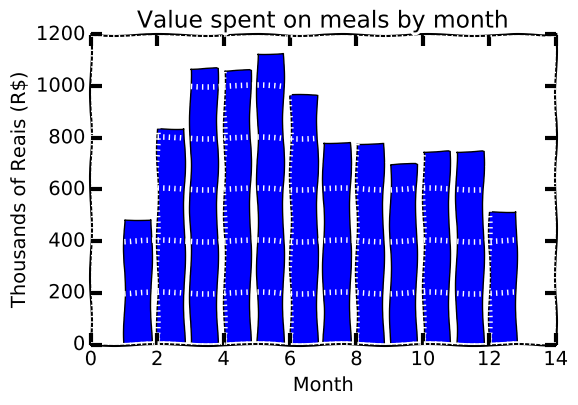

In [11]:
plt.bar(sum_by_month['month'], sum_by_month['net_value_total']/1000)
plt.title('Value spent on meals by month')
plt.ylabel('Thousands of Reais (R$)')
plt.xlabel('Month')
plt.grid()


# Top ten most expensive parties

In [12]:
sum_per_party = find_sum_of_values(meals, 'party', 'net_value')

sum_per_party.sort_values(by='net_value_total', ascending=False)[0:10]

,net_value_max,net_value_mean,net_value_min,net_value_total,occurences,party
9,4200.00,71.485126,0.00,1458368.05,20401.0,PMDB
3,1374.79,53.991849,0.00,1094144.83,20265.0,PT
6,911.22,58.247317,0.00,748827.51,12856.0,PR
1,1754.50,57.392686,1.49,748285.84,13038.0,PP
11,2865.30,74.661898,1.20,735121.05,9846.0,PSD
16,3316.50,48.977461,0.00,716687.18,14633.0,PSDB
5,3900.00,54.404865,1.50,690288.93,12688.0,PSB
0,807.59,70.761048,0.01,656874.81,9283.0,DEM
10,1610.57,73.991321,1.50,441950.16,5973.0,PPS
8,1540.00,75.563175,0.00,358698.39,4747.0,PRB


/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


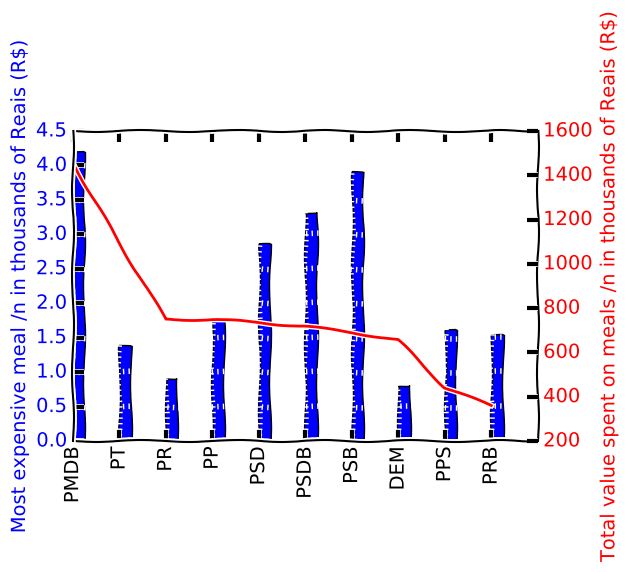

In [13]:
first_ten = sum_per_party.sort_values(by='net_value_total', ascending=False)[0:10]

major_ticks = first_ten['party']

fig, ax1 = plt.subplots()

ax1.bar(range(10), first_ten['net_value_max']/1000, 0.25)
ax1.set_ylabel('Most expensive meal /n in thousands of Reais (R$)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
   
ax2 = ax1.twinx()
ax2.set_ylabel('Total value spent on meals /n in thousands of Reais (R$)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.plot(range(10), first_ten['net_value_total']/1000,'r')

ax1.set_xticks(range(10))
ax1.set_xticklabels(first_ten['party'], rotation='vertical')
ax1.grid()

# Data per year

In [14]:
data_per_year = {}
for year in meals['year'].unique():
    data = meals[meals['year']==year]
    data_per_year[year] = {
        'data': data,
        'sum_per_parties': find_sum_of_values(data, 'party', 'net_value'),
        'sum_per_congressperson': find_sum_of_values(data, 'congressperson_name', 'net_value'),
        'congressperson_per_month': find_sum_of_values_per_period(data, 'congressperson_name', 'month', 'net_value'),
        'parties_per_month': find_sum_of_values_per_period(data, 'party', 'month', 'net_value'),
    }



In [ ]:
def find_most_expensive_monthly_expenditures(yearly_data, num=10):              
    sum_per_person = yearly_data['sum_per_congressperson']                      
    person_per_month = yearly_data['congressperson_per_month']                  
    most_expensive = sum_per_person.sort_values(by='net_value_total',           
                                                ascending=False)[0:num]         
    most_expensive_by_month = []                                                
    for name in most_expensive['congressperson_name']:                          
        most_expensive_by_month.append(                                         
            person_per_month[person_per_month['congressperson_name']==name]     
        )                                                                       
    return pd.concat(most_expensive_by_month)

In [15]:
MONTHS = ['JAN', 'FEV', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AGO', 'SET', 'OCT', 'NOV', 'DEZ']
months = range(0, 12)

# TEN MOST EXPENSIVE CONGRESS PERSON 2015

/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


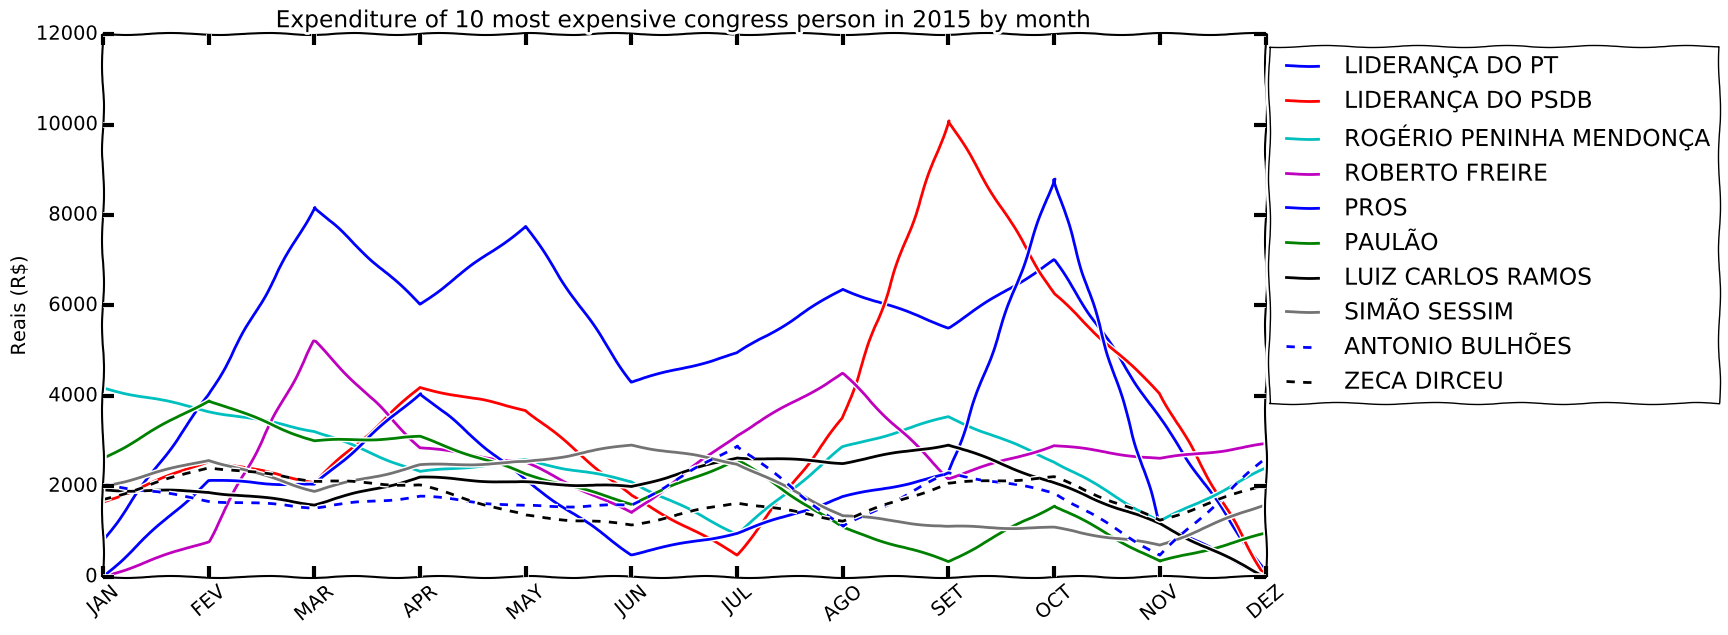

In [16]:
YEAR = 2015
data = data_per_year[YEAR]
most_expensives = find_most_expensive_monthly_expenditures(data)
mm = most_expensives.set_index('congressperson_name').transpose()
index = [key for key in mm.keys()]

f = plt.figure(figsize=(15, 7))
plt.plot(months, mm[index[0]])
plt.plot(months, mm[index[1]])
plt.plot(months, mm[index[2]])
plt.plot(months, mm[index[3]])
plt.plot(months, mm[index[4]])
plt.plot(months, mm[index[5]], 'g')
plt.plot(months, mm[index[6]], 'k')
plt.plot(months, mm[index[7]], '0.45')
plt.plot(months, mm[index[8]], '--b')
plt.plot(months, mm[index[9]], '--k')
plt.xlim(0, 11)
plt.title('Expenditure of 10 most expensive congress person in {} by month'.format(YEAR))
plt.ylabel('Reais (R$)')
plt.legend(index, bbox_to_anchor=(1.4, 1))
ax1 = f.get_axes()[0]
ax1.set_xticks(range(12))
ax1.set_xticklabels(MONTHS, rotation=40)

# TEN MOST EXPENSIVE CONGRESS PERSON 2014

/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


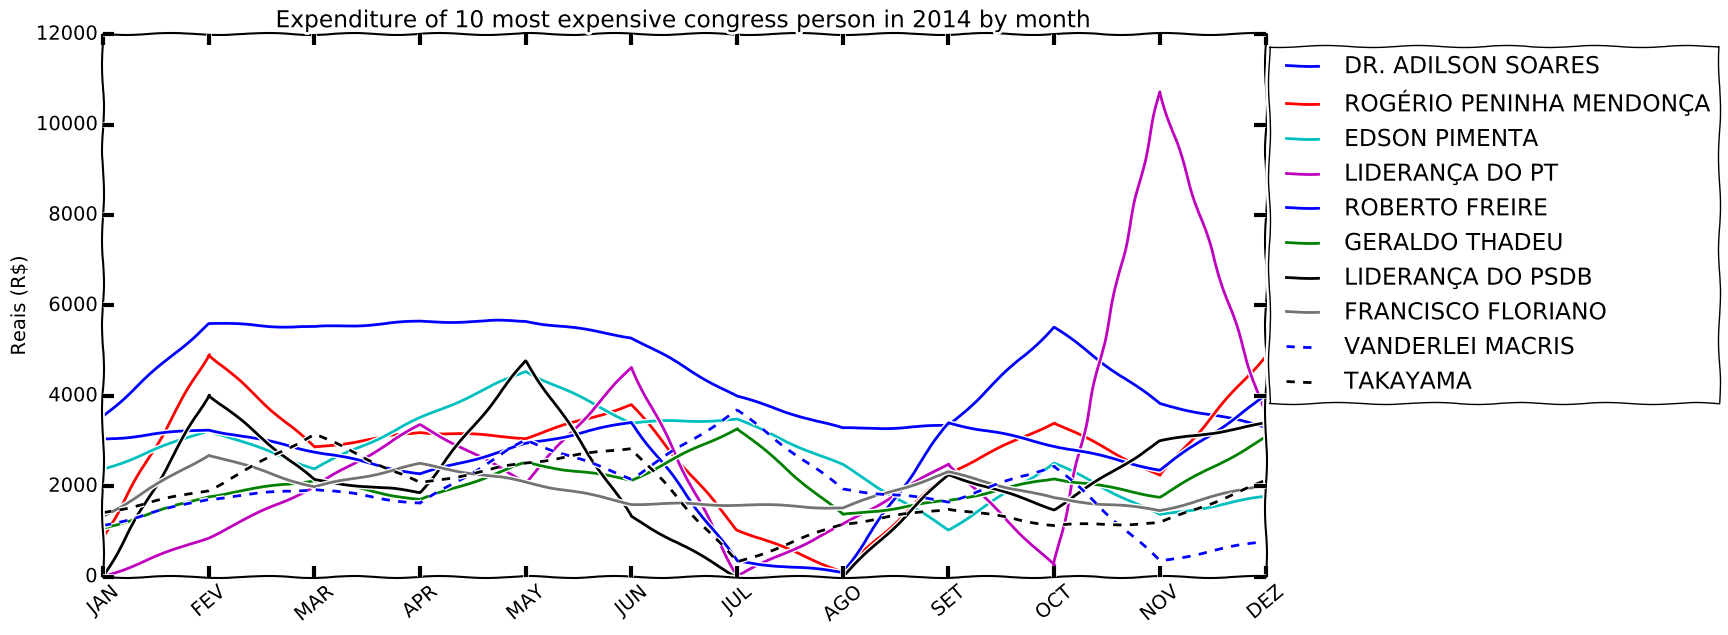

In [17]:
YEAR = 2014
data = data_per_year[YEAR]
most_expensives = find_most_expensive_monthly_expenditures(data)
mm = most_expensives.set_index('congressperson_name').transpose()
index = [key for key in mm.keys()]

f = plt.figure(figsize=(15, 7))
plt.plot(months, mm[index[0]])
plt.plot(months, mm[index[1]])
plt.plot(months, mm[index[2]])
plt.plot(months, mm[index[3]])
plt.plot(months, mm[index[4]])
plt.plot(months, mm[index[5]], 'g')
plt.plot(months, mm[index[6]], 'k')
plt.plot(months, mm[index[7]], '0.45')
plt.plot(months, mm[index[8]], '--b')
plt.plot(months, mm[index[9]], '--k')
plt.xlim(0, 11)
plt.title('Expenditure of 10 most expensive congress person in {} by month'.format(YEAR))
plt.ylabel('Reais (R$)')
plt.legend(index, bbox_to_anchor=(1.4, 1))
ax1 = f.get_axes()[0]
ax1.set_xticks(range(12))
ax1.set_xticklabels(MONTHS, rotation=40)

# TEN MOST EXPENSIVE CONGRESS PERSON 2013

/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


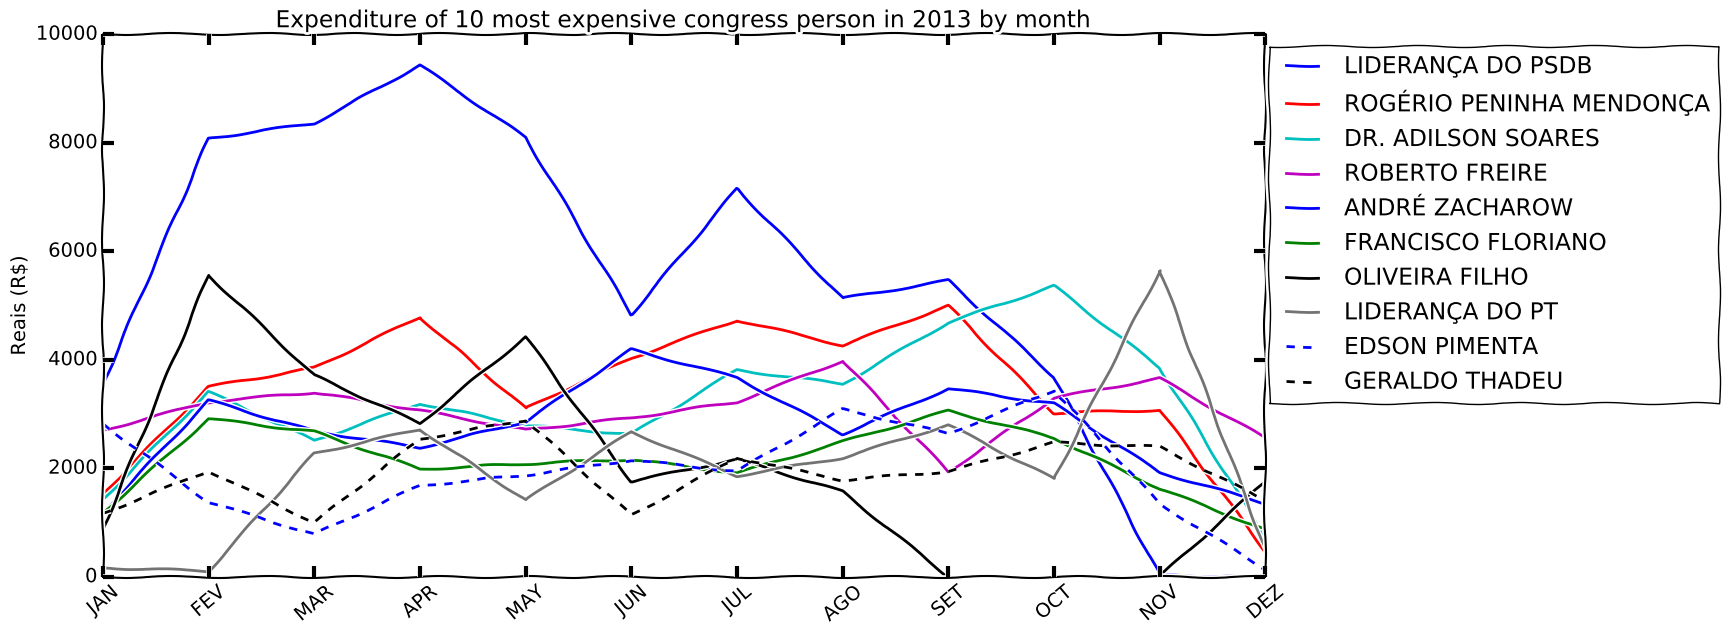

In [18]:
YEAR = 2013
data = data_per_year[YEAR]
most_expensives = find_most_expensive_monthly_expenditures(data)
mm = most_expensives.set_index('congressperson_name').transpose()
index = [key for key in mm.keys()]

f = plt.figure(figsize=(15, 7))
plt.plot(months, mm[index[0]])
plt.plot(months, mm[index[1]])
plt.plot(months, mm[index[2]])
plt.plot(months, mm[index[3]])
plt.plot(months, mm[index[4]])
plt.plot(months, mm[index[5]], 'g')
plt.plot(months, mm[index[6]], 'k')
plt.plot(months, mm[index[7]], '0.45')
plt.plot(months, mm[index[8]], '--b')
plt.plot(months, mm[index[9]], '--k')
plt.xlim(0, 11)
plt.title('Expenditure of 10 most expensive congress person in {} by month'.format(YEAR))
plt.ylabel('Reais (R$)')
plt.legend(index, bbox_to_anchor=(1.4, 1))
ax1 = f.get_axes()[0]
ax1.set_xticks(range(12))
ax1.set_xticklabels(MONTHS, rotation=40)

# TEN MOST EXPENSIVE CONGRESS PERSON 2012

/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


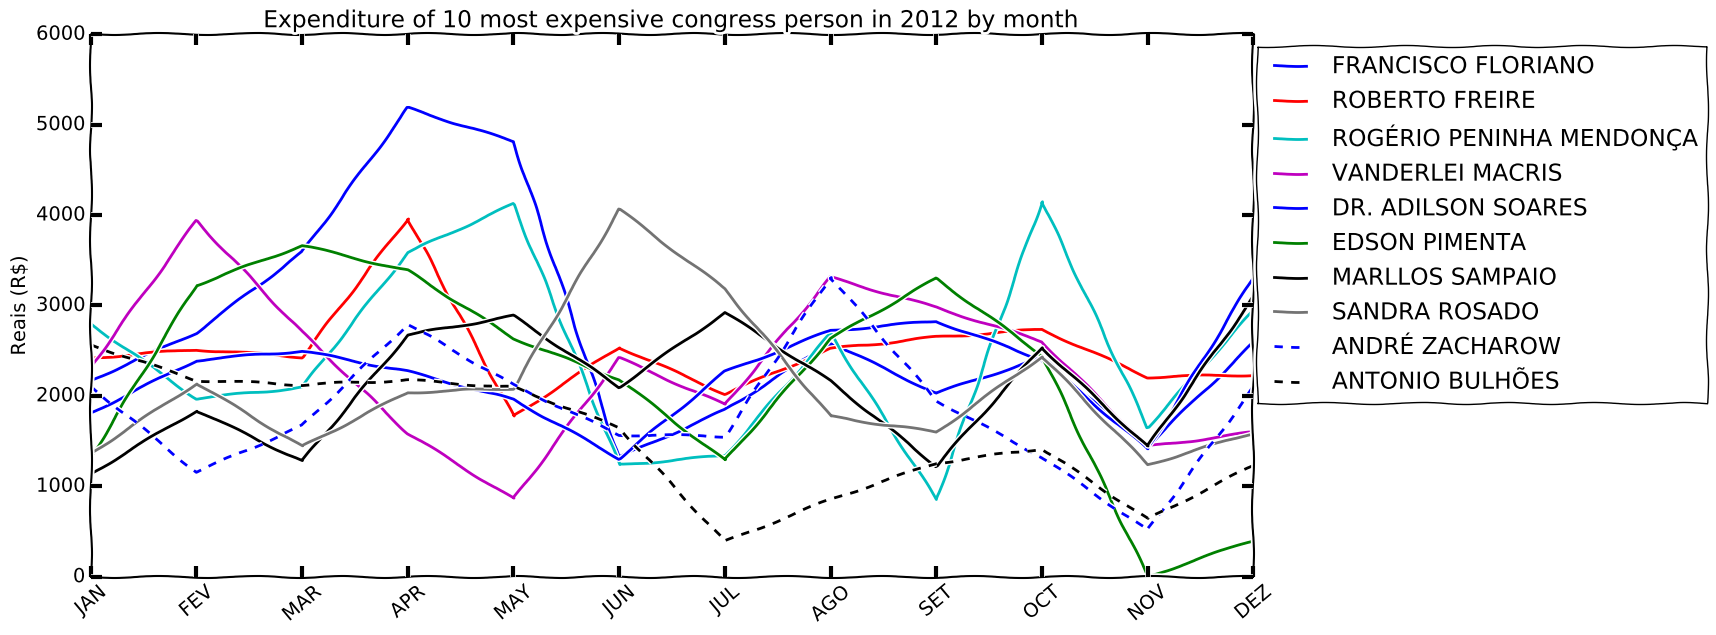

In [19]:
YEAR = 2012
data = data_per_year[YEAR]
most_expensives = find_most_expensive_monthly_expenditures(data)
mm = most_expensives.set_index('congressperson_name').transpose()
index = [key for key in mm.keys()]

f = plt.figure(figsize=(15, 7))
plt.plot(months, mm[index[0]])
plt.plot(months, mm[index[1]])
plt.plot(months, mm[index[2]])
plt.plot(months, mm[index[3]])
plt.plot(months, mm[index[4]])
plt.plot(months, mm[index[5]], 'g')
plt.plot(months, mm[index[6]], 'k')
plt.plot(months, mm[index[7]], '0.45')
plt.plot(months, mm[index[8]], '--b')
plt.plot(months, mm[index[9]], '--k')
plt.xlim(0, 11)
plt.title('Expenditure of 10 most expensive congress person in {} by month'.format(YEAR))
plt.ylabel('Reais (R$)')
plt.legend(index, bbox_to_anchor=(1.4, 1))
ax1 = f.get_axes()[0]
ax1.set_xticks(range(12))
ax1.set_xticklabels(MONTHS, rotation=40)

# TEN MOST EXPENSIVE CONGRESS PERSON 2011

/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


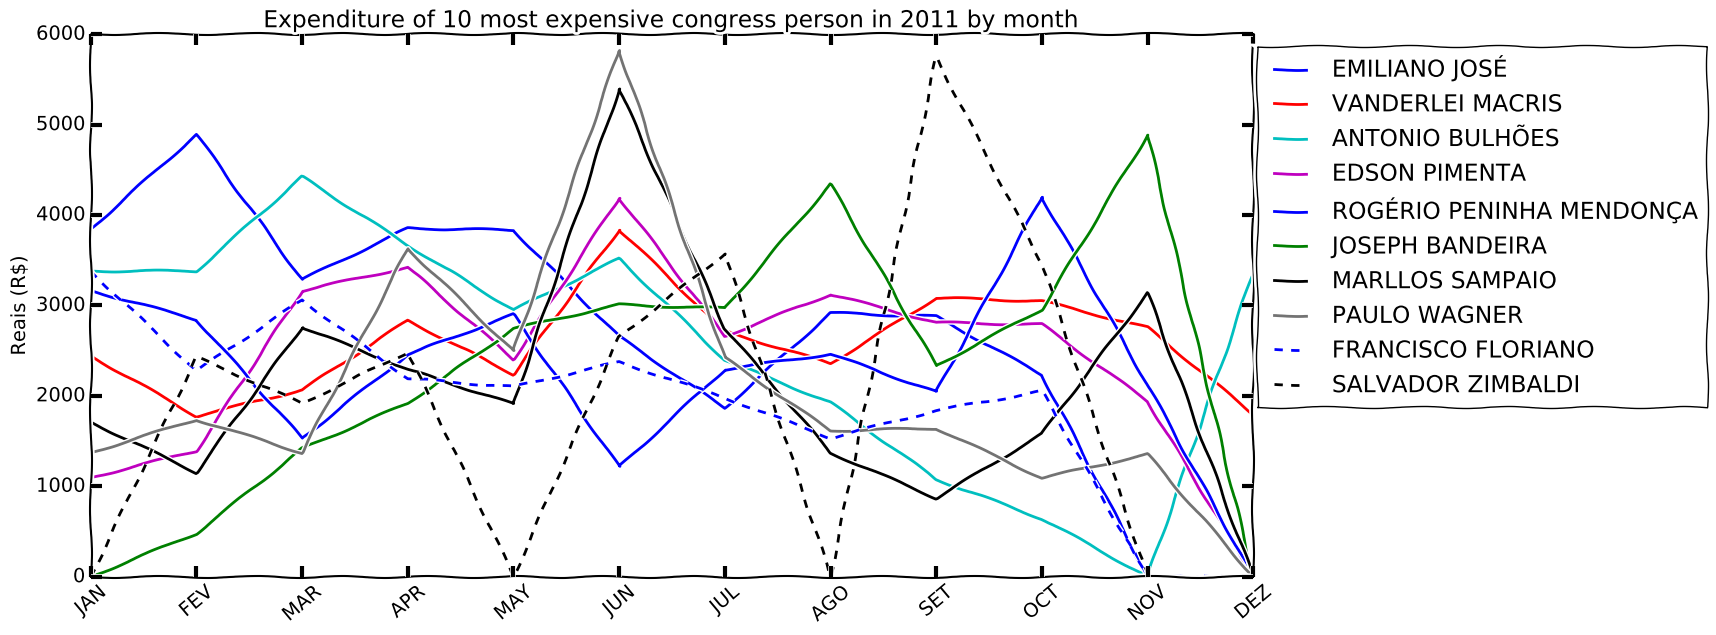

In [20]:
YEAR = 2011
data = data_per_year[YEAR]
most_expensives = find_most_expensive_monthly_expenditures(data)
mm = most_expensives.set_index('congressperson_name').transpose()
index = [key for key in mm.keys()]

f = plt.figure(figsize=(15, 7))
plt.plot(months, mm[index[0]])
plt.plot(months, mm[index[1]])
plt.plot(months, mm[index[2]])
plt.plot(months, mm[index[3]])
plt.plot(months, mm[index[4]])
plt.plot(months, mm[index[5]], 'g')
plt.plot(months, mm[index[6]], 'k')
plt.plot(months, mm[index[7]], '0.45')
plt.plot(months, mm[index[8]], '--b')
plt.plot(months, mm[index[9]], '--k')
plt.xlim(0, 11)
plt.title('Expenditure of 10 most expensive congress person in {} by month'.format(YEAR))
plt.ylabel('Reais (R$)')
plt.legend(index, bbox_to_anchor=(1.4, 1))
ax1 = f.get_axes()[0]
ax1.set_xticks(range(12))
ax1.set_xticklabels(MONTHS, rotation=40)